In [20]:
import pandas as pd
import numpy as np
%matplotlib inline

In [21]:
ds = pd.read_csv("Emp_Sal.csv")

In [22]:
ds.head()

,age,income
0,25,30450
1,30,35670
2,47,31580
3,32,40130
4,43,47830


<AxesSubplot:xlabel='age', ylabel='income'>

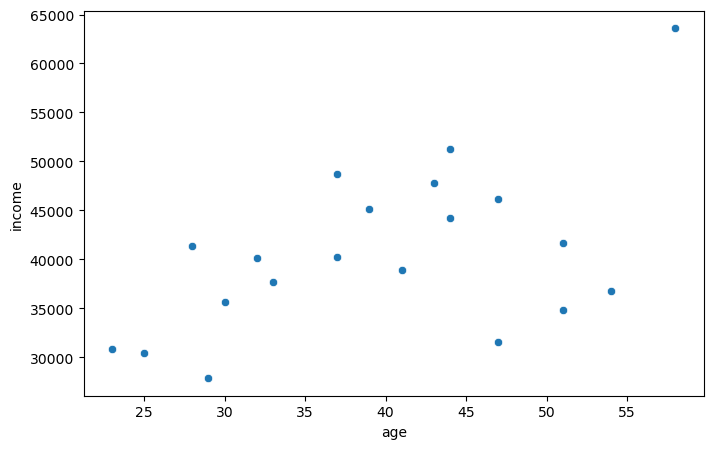

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x=ds["age"], y=ds["income"])

In [24]:
ds["age"] = (ds["age"] - ds["age"].min()) / (ds["age"].max() - ds["age"].min())
ds["income"] = (ds["income"] - ds["income"].min()) / (ds["income"].max() - ds["income"].min())

ds.head()

,age,income
0,0.057143,0.072987
1,0.200000,0.218960
2,0.685714,0.104586
3,0.257143,0.343680
4,0.571429,0.559004


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ds = scaler.fit_transform(ds)
ds = pd.DataFrame(ds, columns=["age", "income"])
ds.head()

,age,income
0,0.057143,0.072987
1,0.200000,0.218960
2,0.685714,0.104586
3,0.257143,0.343680
4,0.571429,0.559004


In [26]:
from sklearn.cluster import KMeans

In [27]:
init_centroids = np.array([[0.01,0.02], [0.01, 0.015], [0.01, 0.022], [0.01, 0.023]])
kmeans = KMeans(n_clusters=4, init=init_centroids, n_init=1)
kmeans.fit(ds)


C:\Users\khali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init=array([[0.01 , 0.02 ],
       [0.01 , 0.015],
       [0.01 , 0.022],
       [0.01 , 0.023]]),
       n_clusters=4, n_init=1)

In [29]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.         1.        ]
 [0.15918367 0.19602908]
 [0.79285714 0.23329139]
 [0.52857143 0.4883599 ]]


Text(0.4585714285714286, 0.4183598993288591, 'Cluster 4')

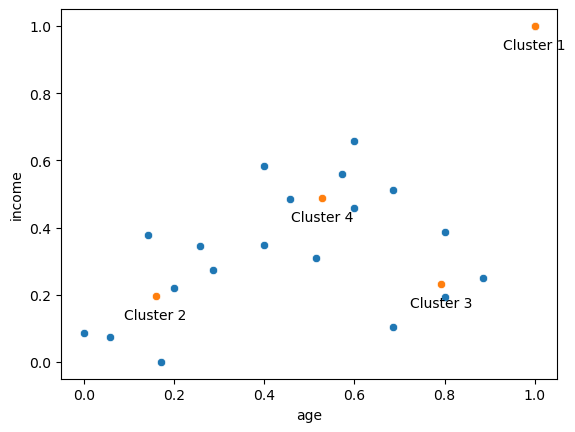

In [31]:
offset = 0.07
fig, ax = plt.subplots()
sns.scatterplot(x=ds["age"], y=ds["income"])
sns.scatterplot(x=centroids[:,0], y=centroids[:,1])
ax.annotate('Cluster 1', xy=(centroids[0,0]-offset,centroids[0,1]-offset))
ax.annotate('Cluster 2', xy=(centroids[1,0]-offset,centroids[1,1]-offset))
ax.annotate('Cluster 3', xy=(centroids[2,0]-offset,centroids[2,1]-offset))
ax.annotate('Cluster 4', xy=(centroids[3,0]-offset,centroids[3,1]-offset))

Text(0.4585714285714286, 0.4183598993288591, 'Cluster 4')

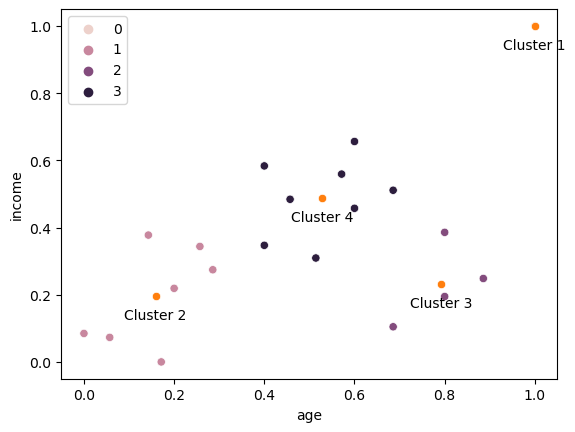

In [33]:
offset = 0.07
pred = kmeans.predict(ds)
fig, ax = plt.subplots()
sns.scatterplot(x=ds["age"], y=ds["income"], hue=pred)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1])
ax.annotate('Cluster 1', xy=(centroids[0,0]-offset,centroids[0,1]-offset))
ax.annotate('Cluster 2', xy=(centroids[1,0]-offset,centroids[1,1]-offset))
ax.annotate('Cluster 3', xy=(centroids[2,0]-offset,centroids[2,1]-offset))
ax.annotate('Cluster 4', xy=(centroids[3,0]-offset,centroids[3,1]-offset))

In [35]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(ds)

C:\Users\khali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [36]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.52857143 0.4883599 ]
 [1.         1.        ]
 [0.79285714 0.23329139]
 [0.15918367 0.19602908]]


Text(0.08918367346938777, 0.12602908277404923, 'Cluster 4')

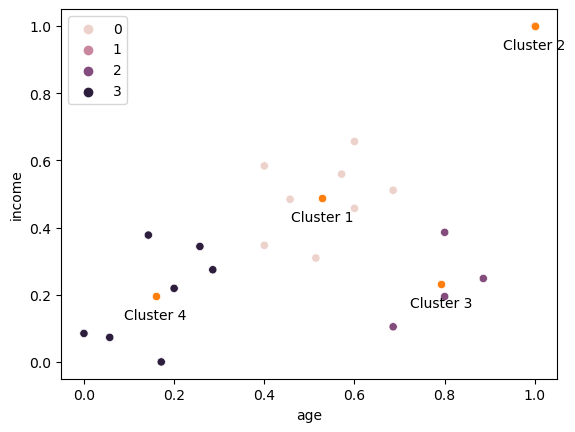

In [37]:
offset = 0.07
pred = kmeans.predict(ds)
fig, ax = plt.subplots()
sns.scatterplot(x=ds["age"], y=ds["income"], hue=pred)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1])
ax.annotate('Cluster 1', xy=(centroids[0,0]-offset,centroids[0,1]-offset))
ax.annotate('Cluster 2', xy=(centroids[1,0]-offset,centroids[1,1]-offset))
ax.annotate('Cluster 3', xy=(centroids[2,0]-offset,centroids[2,1]-offset))
ax.annotate('Cluster 4', xy=(centroids[3,0]-offset,centroids[3,1]-offset))

In [38]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(ds)

C:\Users\khali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [39]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.44285714 0.43092841]
 [0.79285714 0.23329139]
 [0.07619048 0.05257271]
 [1.         1.        ]
 [0.22142857 0.30362136]
 [0.61428571 0.54579139]]


Text(0.5442857142857143, 0.4757913870246085, 'Cluster 6')

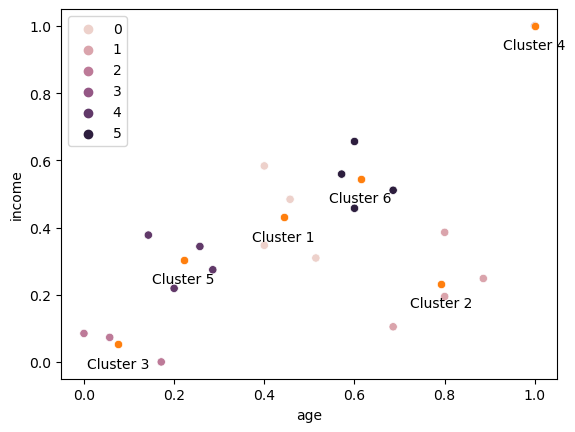

In [40]:
offset = 0.07
pred = kmeans.predict(ds)
fig, ax = plt.subplots()
sns.scatterplot(x=ds["age"], y=ds["income"], hue=pred)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1])
ax.annotate('Cluster 1', xy=(centroids[0,0]-offset,centroids[0,1]-offset))
ax.annotate('Cluster 2', xy=(centroids[1,0]-offset,centroids[1,1]-offset))
ax.annotate('Cluster 3', xy=(centroids[2,0]-offset,centroids[2,1]-offset))
ax.annotate('Cluster 4', xy=(centroids[3,0]-offset,centroids[3,1]-offset))
ax.annotate('Cluster 5', xy=(centroids[4,0]-offset,centroids[4,1]-offset))
ax.annotate('Cluster 6', xy=(centroids[5,0]-offset,centroids[5,1]-offset))

C:\Users\khali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\khali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\khali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\khali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Inertia (Sum of squared distance)')

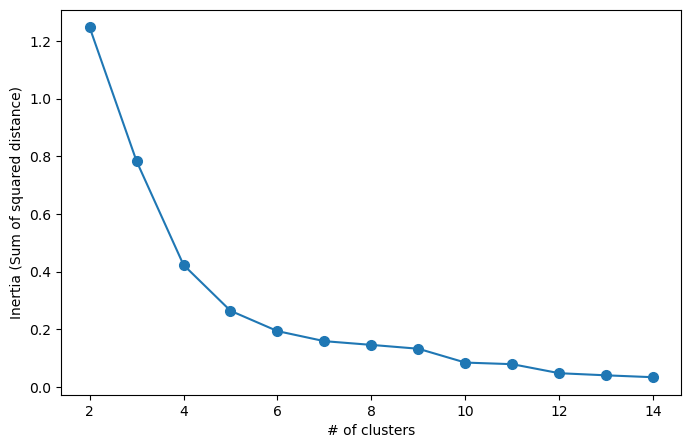

In [42]:
inrt = []
m = 15
for c in range(2,m):
    km = KMeans(n_clusters=c)
    km.fit(ds.iloc[:,0:2])
    inrt.append(km.inertia_)
plt.figure(figsize=(8,5))
plt.plot([c for c in range(2,m)], inrt, marker='.', markersize=14)
plt.xlabel("# of clusters")
plt.ylabel("Inertia (Sum of squared distance)")